In [24]:
# подключаем библиотеки
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
# загружаем датасет
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0   202k      0 --:--:-- --:--:-- --:--:--  202k


In [3]:
# инициализируем датасет
import pandas as pd
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [4]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [5]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [6]:
# выбираем y как метку по которой будем "учиться"
y=df['group']

In [7]:
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [8]:
# удаляем из dataframe метку group
df.drop('group', axis='columns', inplace=True)

In [16]:
df.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [19]:
# подготавливаем X
X = df.values

In [22]:
# подготоавливаем код для отрисовки результатов

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])

def meshGrid(x_data, y_data):
    h = 1  
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   size=(15, 8)):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=size)

    if clf:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

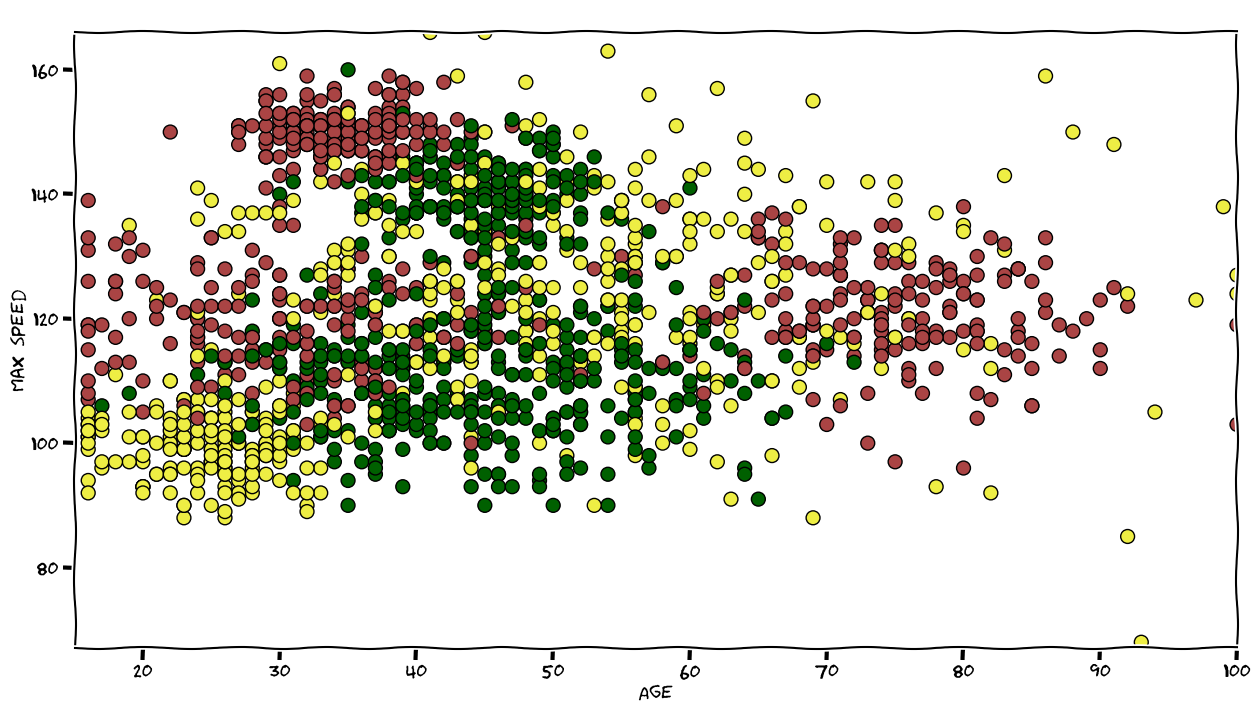

In [26]:
plotPrediction(None, X[:, 1], X[:, 0], 
               'Age', 'Max speed', y,
                title="Все данные")

In [27]:
X[:, :2]

array([[ 98.,  44.],
       [118.,  54.],
       [111.,  26.],
       ...,
       [138.,  41.],
       [100.,  31.],
       [100.,  58.]])

In [28]:
# обучение 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X[:, :2], y)

CPU times: user 2.81 ms, sys: 0 ns, total: 2.81 ms
Wall time: 2.88 ms


DecisionTreeClassifier()

In [29]:
# прогноз
input = [[100.0, 48.0]]
clf.predict(input)

array([1])

In [30]:
# давайте разделим данные
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [31]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

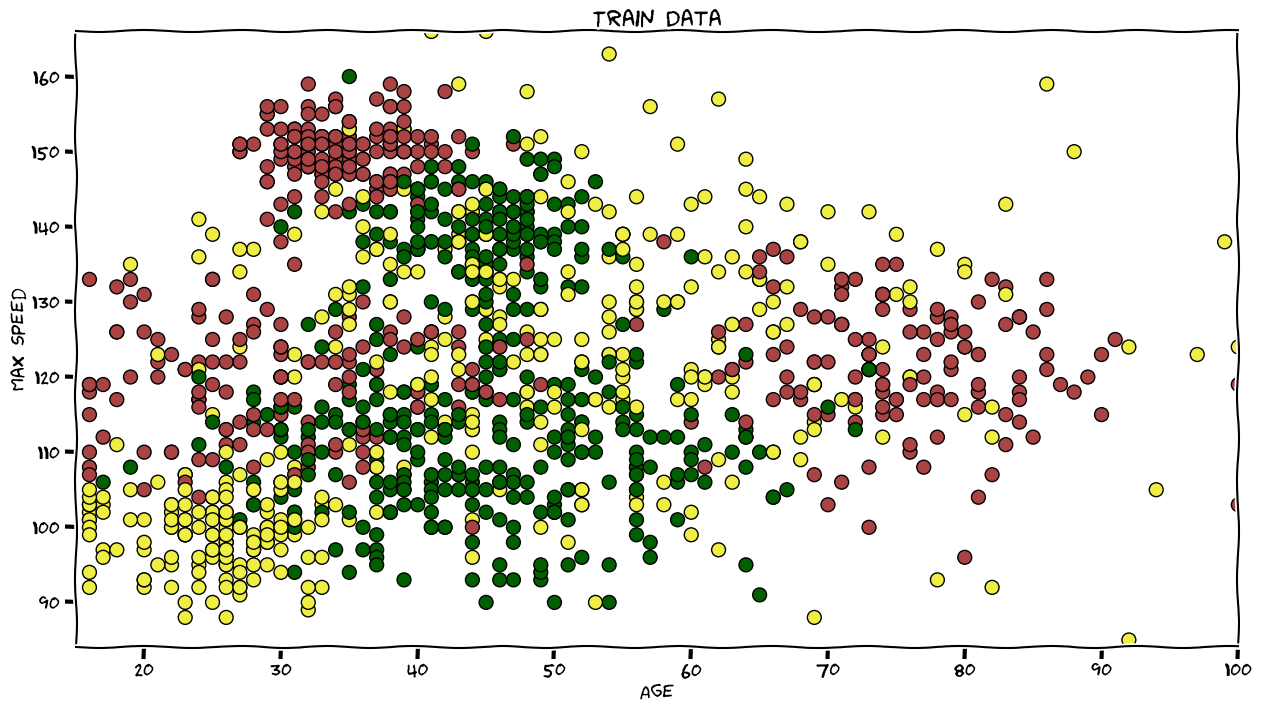

In [32]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, title="Train Data")

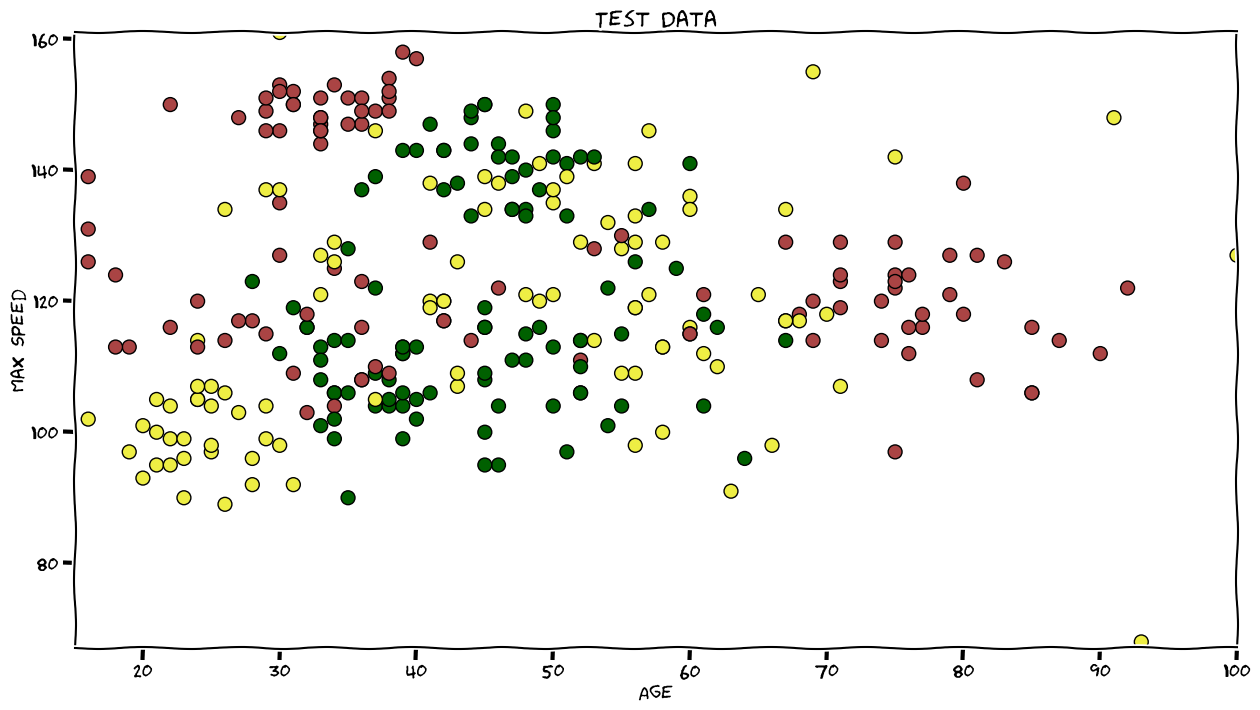

In [33]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, title="Test Data")

In [34]:
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 3.53 ms, sys: 837 µs, total: 4.37 ms
Wall time: 4.03 ms


DecisionTreeClassifier()

In [35]:
# максимальная глубина получившегося дерева
clf.tree_.max_depth

18

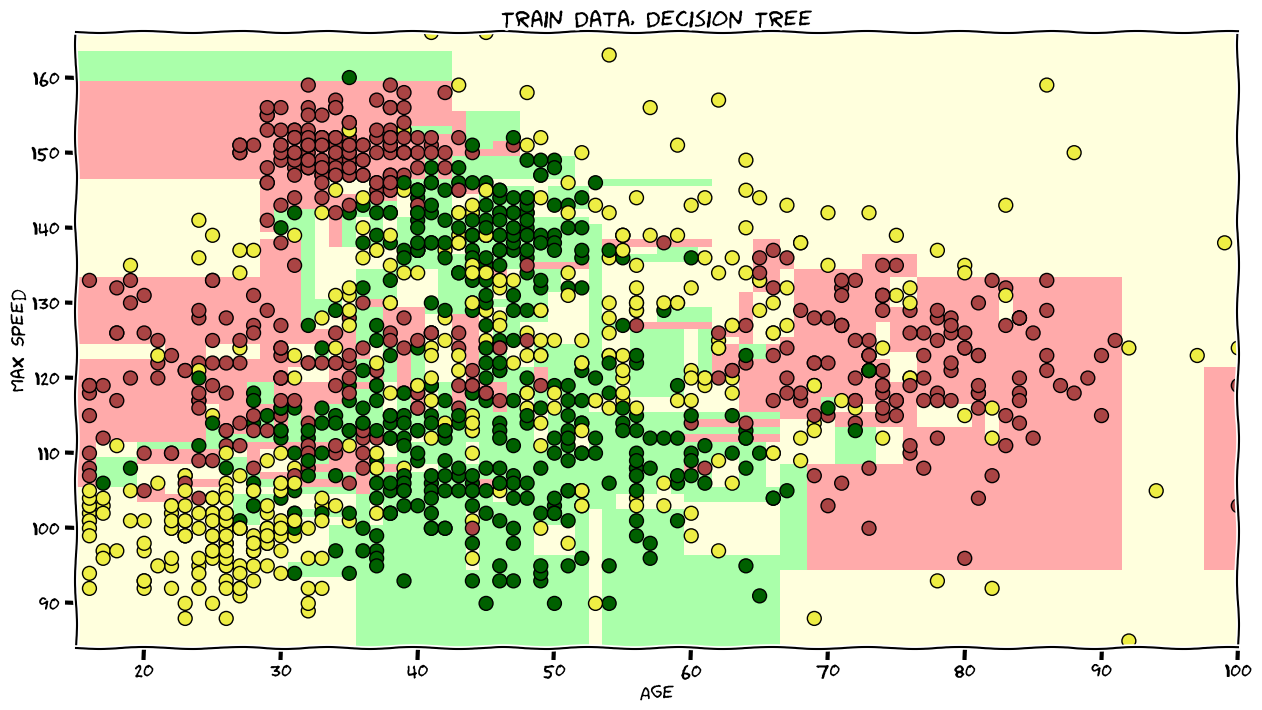

In [36]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree")

In [ ]:
clf.score(X_train_2_dim, y_train)

0.9425

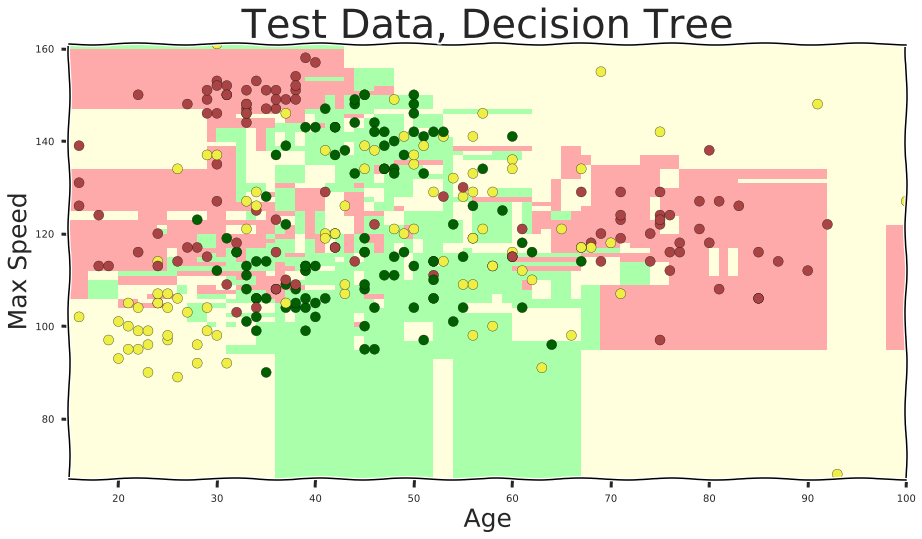

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree")

In [37]:
clf.score(X_test_2_dim, y_test)

0.6

In [38]:
clf = DecisionTreeClassifier(max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 2.14 ms, sys: 1.95 ms, total: 4.09 ms
Wall time: 3.77 ms


DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)

In [39]:
clf.tree_.max_depth

10

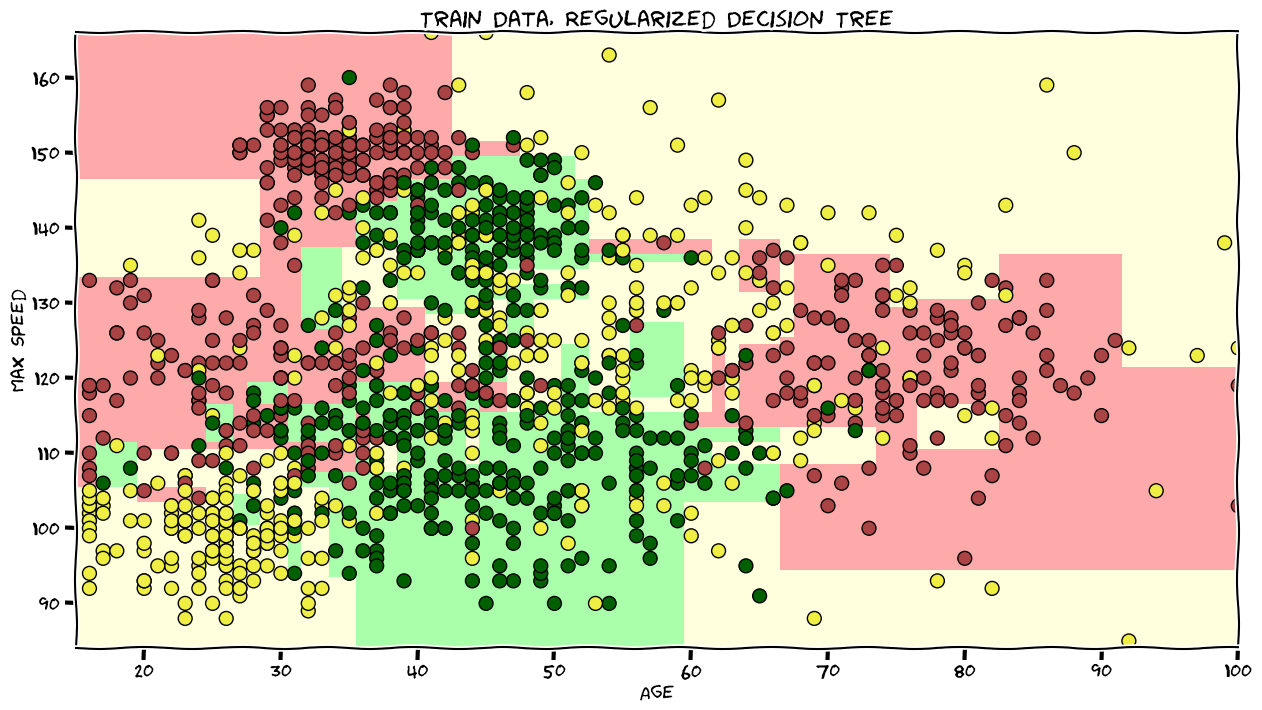

In [40]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree")

In [ ]:
clf.score(X_train_2_dim, y_train)

0.8025

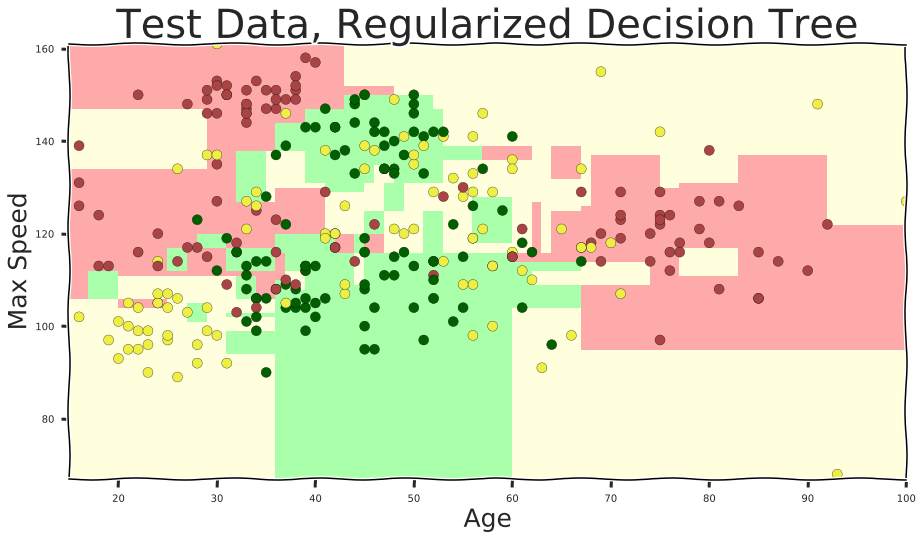

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree")

In [41]:
clf.score(X_test_2_dim, y_test)

0.6433333333333333

In [42]:
# сделаем регуляризацию модели

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.63      , 0.66333333, 0.67666667, 0.66666667, 0.7       ])

In [44]:
# строим решетку GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X[:, :2], y)
clf.best_params_

CPU times: user 2.73 s, sys: 57.6 ms, total: 2.79 s
Wall time: 21.3 s


{'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [45]:
clf = DecisionTreeClassifier(max_depth=9,
                              min_samples_leaf=7,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 2.27 ms, sys: 0 ns, total: 2.27 ms
Wall time: 2.28 ms


DecisionTreeClassifier(max_depth=9, min_samples_leaf=7)

In [46]:
clf.score(X_train_2_dim, y_train)

0.7658333333333334

In [47]:
clf.score(X_test_2_dim, y_test)

0.6766666666666666

In [48]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.68333333, 0.68666667, 0.68333333, 0.68666667, 0.71666667])